# The entire world is transforming digitally and our relationship with technology has grown exponentially over the last few years. We have grown closer to technology, and it has made our life a lot easier by saving time and effort. Today everything is accessible with smartphones — from groceries to cooked food and from medicines to doctors. In this hackathon, we provide you with data that is a by-product as well as a thriving proof of this growing relationship. When was the last time you ordered food online? And how long did it take to reach you? In this hackathon,There is data from thousands of restaurants in India regarding the time they take to deliver food for online order. We have to predict the online order delivery time based on the given factors.

# Loading Data files

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('F:\\Data_Train.xlsx',encoding="utf-8")    
test=pd.read_excel('F:\\Data_Test.xlsx',encoding="utf-8")
df=df.drop('Restaurant',1)
test=test.drop('Restaurant',1)
df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [6]:
df['Location'].nunique()

35

In [7]:
df['Cuisines'].nunique()

2179

# EDA and Preprocessing

In [8]:
df['Average_Cost']=df['Average_Cost'].str.extract('(\d+)')
df['Average_Cost']=df['Average_Cost'].astype('float')
test['Average_Cost']=test['Average_Cost'].str.extract('(\d+)')
test['Average_Cost']=test['Average_Cost'].astype('float')

In [9]:
df['Minimum_Order']=df['Minimum_Order'].str.extract('(\d+)')
df['Minimum_Order']=df['Minimum_Order'].astype('float')
test['Minimum_Order']=test['Minimum_Order'].str.extract('(\d+)')
test['Minimum_Order']=test['Minimum_Order'].astype('float')

In [10]:
df.info()

In [11]:
df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12,4,30 minutes
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11,4,30 minutes
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99,30,65 minutes
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176,95,30 minutes
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521,235,65 minutes


In [12]:
df['Votes']=df['Votes'].str.replace('-','0')
test['Votes']=test['Votes'].str.replace('-','0')
test['Votes']=test['Votes'].astype('float')
df['Votes']=df['Votes'].astype('float')

In [13]:
#df['Minimum_Order']=df['Minimum_Order'].astype('float')
df['Reviews']=df['Reviews'].str.replace('-','0')
test['Reviews']=test['Reviews'].str.replace('-','0')
test['Reviews']=test['Reviews'].astype('float')
df['Reviews']=df['Reviews'].astype('float')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Delivery_Time'])
df['Delivery_Time']=le.transform(df['Delivery_Time'])
df['Delivery_Time']=df['Delivery_Time'].astype('category')

In [15]:
df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,3
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,3
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,5
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,3
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,5


In [16]:
df.info()

In [17]:
df['Rating']=df['Rating'].str.replace('NEW','0')
df['Rating']=df['Rating'].str.replace('Opening Soon','-1')
df['Rating']=df['Rating'].str.replace('Temporarily Closed','99')
df['Rating']=df['Rating'].str.replace('-','999')
df['Rating']=df['Rating'].astype('float')

In [18]:
test['Rating']=test['Rating'].str.replace('NEW','0')
test['Rating']=test['Rating'].str.replace('Opening Soon','-1')
test['Rating']=test['Rating'].str.replace('-','999')
test['Rating']=test['Rating'].astype('float')

In [19]:
df.shape

(11094, 8)

In [20]:
test.shape

(2774, 7)

In [21]:
df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,3
1,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,3
2,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,5
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,3
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,5


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

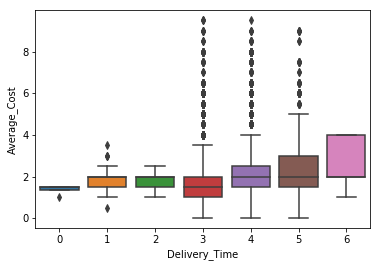

In [23]:
#df['Average_Cost']=np.log(df['Average_Cost'])
df['Average_Cost']=df['Average_Cost']/100
sns.boxplot(x=df['Delivery_Time'],y=df['Average_Cost'])

In [24]:
df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",2.0,50.0,3.5,12.0,4.0,3
1,"Sector 3, Marathalli","Ice Cream, Desserts",1.0,50.0,3.5,11.0,4.0,3
2,Mumbai Central,"Italian, Street Food, Fast Food",1.5,50.0,3.6,99.0,30.0,5
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",2.5,99.0,3.7,176.0,95.0,3
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",2.0,99.0,3.2,521.0,235.0,5


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_features=100)
tf.fit(df['Location'])
df_tf=pd.DataFrame(tf.transform(df['Location']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
df=df.join(df_tf)
df=df.drop('Location',1)

In [26]:
test_tf=pd.DataFrame(tf.transform(test['Location']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
test=test.join(test_tf)
test=test.drop('Location',1)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_features=92)
tf.fit(df['Cuisines'])
df_tf=pd.DataFrame(tf.transform(df['Cuisines']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf1_')
df=df.join(df_tf)
df=df.drop('Cuisines',1)

In [28]:
test_tf=pd.DataFrame(tf.transform(test['Cuisines']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf1_')
test=test.join(test_tf)
test=test.drop('Cuisines',1)

In [29]:
df.shape

(11094, 179)

In [30]:
test.shape

(2774, 178)

In [31]:
df.isnull().sum()

Average_Cost            1
Minimum_Order           0
Rating                  0
Votes                   0
Reviews                 0
Delivery_Time           0
tfidf_14                0
tfidf_3a                0
tfidf_63                0
tfidf_63a               0
tfidf_administration    0
tfidf_area              0
tfidf_babarpur          0
tfidf_bangalore         0
tfidf_bazaar            0
tfidf_bazar             0
tfidf_begumpet          0
tfidf_block             0
tfidf_btm               0
tfidf_cantt             0
tfidf_centennial        0
tfidf_central           0
tfidf_chandni           0
tfidf_chatta            0
tfidf_chowk             0
tfidf_city              0
tfidf_college           0
tfidf_colony            0
tfidf_court             0
tfidf_cst               0
                       ..
tfidf1_mithai           0
tfidf1_modern           0
tfidf1_momos            0
tfidf1_mughlai          0
tfidf1_naga             0
tfidf1_north            0
tfidf1_odia             0
tfidf1_paan 

In [32]:
df['Average_Cost']=df['Average_Cost'].fillna(200)

# Modeling

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier

In [34]:
x=df.drop('Delivery_Time',1)
y=df['Delivery_Time']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

In [36]:
from xgboost import XGBClassifier
clf= XGBClassifier(n_estimators=50,max_depth=5,subsample=0.8,colsample_bytree=0.8)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.738284066330209

In [37]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=50, depth=3, learning_rate=0.2, loss_function='MultiClass',
                         eval_metric='Accuracy')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7141312184571017

In [38]:
log=LogisticRegression()
log.fit(x_train,y_train)
log.score(x_test,y_test)

0.6961067051189618

In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7227829848594088

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40,n_jobs=-1)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.7595529920692141

In [41]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(n_estimators=30)
bag.fit(x_train,y_train)
bag.score(x_test,y_test)

0.7829848594087959

In [42]:
y_test=clf.predict(test)

In [43]:
y_test

array([3, 3, 3, ..., 3, 1, 3], dtype=int64)

In [44]:
y_test=le.inverse_transform(y_test)

In [45]:
sub=pd.DataFrame(y_test,columns=['Delivery_Time'])

In [46]:
sub['Delivery_Time'].value_counts()

30 minutes     2269
45 minutes      481
65 minutes       16
120 minutes       7
80 minutes        1
Name: Delivery_Time, dtype: int64

In [47]:
sub.to_excel('F:\\final.xlsx',index=False)

In [48]:
sub.shape

(2774, 1)

In [49]:
sub

,Delivery_Time
0,30 minutes
1,30 minutes
2,30 minutes
3,30 minutes
4,30 minutes
5,30 minutes
6,30 minutes
7,30 minutes
8,30 minutes
9,30 minutes
